# Beta Distributions for Coin Flipping MAP Estimates

The ***$\beta$ distribution*** is a ***conjugate prior*** for the ***binomial distribution likelihood***. This means that for a binomial likelihood function and a $\beta$ prior, the posterior distribution will also be a $\beta$ distribution. In this exercise we'll write code to see that in action. 

The binomial likelihood is generated for instance by the basic process of flipping a coin $n$ times with probability $p$ of a heads each time.  We can start with a simple uniform distribution $\beta$ prior and watch as it changes to become more peaked around the true value $p$ as we successively flip more and more coins.

Let's start with our basic imports:

In [1]:
# Numpy for generating a [0, 1] range for the Beta distribution
import numpy as np
# Matplotlib for plotting
from matplotlib import pyplot as plt
%matplotlib inline
# Scipy for working with the beta distribution
from scipy.stats import beta
# Random for doing randomized coin flips
from random import random
# Python 3 Compatibility
from __future__ import print_function

First let's set up some constants for use throughout the experiment:
- `n = 10`: flips per iteration of coin flipping
- `p = 0.6`:  the true value of the probability of a heads, which we're trying to hone in on via the MAP estimator as if *p* is unknown to us.
- `x`: A range of values from 0 to 1 evenly spaced so we can plot pdfs of the $\beta$ distribution.

In [2]:
n = 10
p = 0.6
x = np.linspace(0, 1, 100)

### Exploring the $\beta$ Distribution

Let's plot a bunch of $\beta$ distributions for different values of the **shape parameters** $\alpha$ and $\beta$ to get a better feel for how they effect the distribution.

First we need to generate a bunch of $\beta$ distributions:

In [ ]:
# Generate varying beta distributions
b0 = beta(a=1, b=1)
b1 = beta(a=5, b=1)
b2 = beta(a=1, b=5)
b3 = beta(a=5, b=5)
b4 = beta(a=20, b=20)
b5 = beta(a=17, b=5)
b6 = beta(a=5, b=17)

##### Now let's plot!

In [ ]:
# Create a figure, axes
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# Plot each Beta PDF on 0 to 1, with labels in the legend
ax.plot(x, b0.pdf(x), label='1, 1')
ax.plot(x, b1.pdf(x), label='5, 1')
ax.plot(x, b2.pdf(x), label='1, 5')
ax.plot(x, b3.pdf(x), label='5, 5')
ax.plot(x, b4.pdf(x), label='20, 20')
ax.plot(x, b5.pdf(x), label='17, 5')
ax.plot(x, b6.pdf(x), label='14, 8')
ax.legend(loc='upper right')

## MAP Estimate with a Beta Conjugate Prior

Again the $\beta$ distribution is a conjugate prior for the binomial likelihood.  Thus, the posterior will have the same form as long as the likelihood is binomial.

### Coin Flipping

Successive coin flipping generates a binomial distribution, which is what we want, so let's experiment!  Let's build a function that takes the parameters *n* and *p* and simulates flipping such an unfair coin *n* times:

In [ ]:
def flip_coins(n, p):
    heads = 0
    for i in range(n):
        flip_head = random() < p
        if flip_head:
            heads += 1
    print("Heads: {}  Tails: {}".format(heads, n-heads))
    return heads, n - heads

In [ ]:
# Test our function
flip_coins(n, p)

#### Visualizing a Binomial Likelihood

Let's try flipping a `p = 0.7` coin 100 times using our function, counting the heads, and then repeating this 100 times to visualize the number of heads with a histogram and get a look at how well it approximates the binomial distribution:

In [ ]:
results = []
for i in range(100):
    results.append(flip_coins(100, .7)[0])
plt.hist(results);

#### Updating the $\beta$

Now that we're able to do a run of coin flips, let's implement a function to update our $\beta$ distribution based on the results of our *n* flips.  This is easy to do, because the posterior and prior $\beta$ distributions' shape parameters are simply related by the relations: 

$$\alpha_{posterior} = \alpha_{prior} + \left(\text{# of heads}\right)$$

$$\beta_{posterior} = \beta_{prior} + \left(\text{# of tails}\right)$$

This means as long as we keep a running tally of total heads and tails, we can easily take a look at our current ***posterior*** $\beta$ distribution at any point!

So let's build a function to flip some coins, update the $\beta$ distribution and plot the new one vs the old one.  First we need to initialize the number of heads and tails to their starting values of 1 and 1, which represents a ***uniform prior*** ($\alpha=1$ and $\beta=1$ generates a uniform distribution as we saw above and is reasonable if we have no reason to believe any value of `p` is more likely than the others).  We could have a prior that's more sharply peaked around 0.5 if we wanted (since a lifetime of experience says that almost all coins are fair), but here it's more fun to watch things grow from the starting point of a uniform prior.

In [ ]:
# NOTE: Make sure to run this line to reset things
# Initialize heads and tails counters (for alpha and beta)
total_heads = 1
total_tails = 1
# The uniform prior defined above, just a starting point
STARTING_BETA = b0

In [ ]:
def update_and_plot_betas(old_beta, ax, should_plot=True):
    heads, tails = flip_coins(n, p)
    global total_heads
    global total_tails
    total_heads += heads
    total_tails += tails
    new_beta = beta(total_heads, total_tails)
    if should_plot:
        ax.axvline(p, linestyle='--', color='black')
        ax.plot(x, old_beta.pdf(x), label='Old Beta')
        ax.plot(x, new_beta.pdf(x), label = 'New Beta')
        ax.legend()
    return new_beta

##### Doing it many times!

Finally, let's create a function that iterates through this whole process a parameterized number of time and makes a plot for each subsequent change in the $\beta$ distribution:

In [ ]:
def iterate_coin_flipping(starting_beta, num_iterations):
    old_beta = starting_beta
    fig, axes = plt.subplots(num_iterations, 1, figsize=(15, num_iterations*5))
    for i in range(num_iterations):
        old_beta = update_and_plot_betas(old_beta, axes[i])

In [ ]:
# Let's try a test run of the whole process running 10 times and watch the Beta distribution converge toward p
iterate_coin_flipping(STARTING_BETA, 10)

In [ ]:
total_heads/(0.0 + total_heads + total_tails)

#### Ooo! Animating Beta Convergence with matplotlib

Matplotlib has animation these days, let's see if we can generate an animated movie of this whole process...

<IPython.core.display.Javascript object>


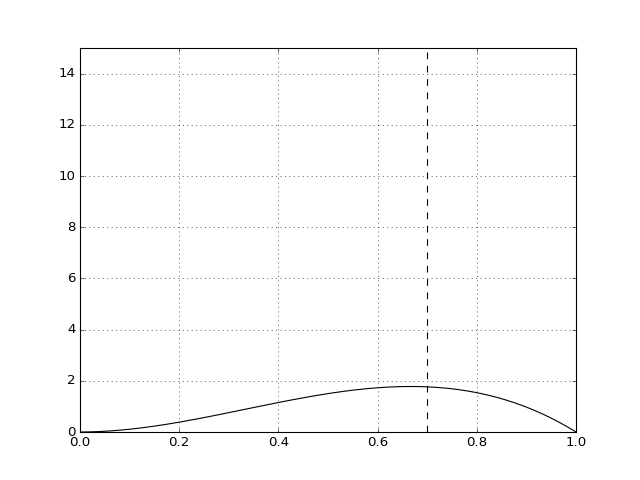

In [3]:
# update a distribution based on new data.
from matplotlib.animation import FuncAnimation
%matplotlib nbagg

class BetaUpdater(object):
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.prob = prob
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax

        # Set up plot parameters
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 15)
        self.ax.grid(True)

        # This vertical line represents the theoretical value, to
        # which the plotted distribution should converge.
        self.ax.axvline(prob, linestyle='--', color='black')

    def init(self):
        self.success = 0
        self.line.set_data([], [])
        return self.line,

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            return self.init()
        
        # Flip a coin
        if np.random.rand(1,) < self.prob:
            self.success += 1
        y = beta.pdf(self.x, self.success + 1, (i - self.success) + 1)
        self.line.set_data(self.x, y)
        return self.line,

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ud = BetaUpdater(ax, prob=0.7)
anim = FuncAnimation(fig, ud, frames=np.arange(100), init_func=ud.init,
        interval=100, blit=True)
plt.show()